# Ridge Regression [20 points]

## Load data files

In [1]:
## if this fails to run, just run it again
from google.colab import files
t_data = files.upload()


Saving hw1_ridge_x.dat to hw1_ridge_x.dat
Saving hw1_ridge_y.dat to hw1_ridge_y.dat


## Splitting of data into training and test matrices

In [0]:
import pandas as pd
import io
from sklearn.model_selection import train_test_split

## creation of training inputs and labels
ridge_x = pd.read_csv(io.BytesIO(t_data['hw1_ridge_x.dat']), header=None)
ridge_y = pd.read_csv(io.BytesIO(t_data['hw1_ridge_y.dat']), header=None)

inputs = ridge_x.to_numpy()
outputs = ridge_y.to_numpy()

# splitting into train and test matrices 
# (in this case i put test size as 0.8 just so that i can use the first 10 as the validation set)

vX, tX, vY, tY = train_test_split(inputs, outputs, test_size=0.8, shuffle=False)


## a) Write ridge_regression function that outputs theta

In [0]:
import numpy as np

def ridge_regression(tX, tY, l):
  # theta = (n * l * identity matrix   + xtrans dot x )inverse dot X(transpose) dot Y
  n = len(tX)
  I = np.identity(4)
  X = tX
  X_transposed = np.transpose(X)
   
  # for (n * l * identity matrix  +  xtransposed dot x)  
  mat_A = np.linalg.inv(((n * l * I) + np.dot(X_transposed, X)))
  
  # for xtransposed dot y
  mat_b = np.dot(X_transposed, tY)
  
  # calculate theta
  theta = np.dot(mat_A, mat_b)
  
  return theta

## Run the ridge_regression function

In [6]:
wei = ridge_regression(tX, tY, 0.15)
print("Theta result: " + str(wei))

Theta result: [[-0.57939825]
 [ 1.15033028]
 [ 0.04934122]
 [-1.59867896]]


## b) Plot graphs of validation loss and training loss as lambda varies on logarithmic scale. Write down the value of lambda that minimizes validation loss

The lambda that minimizes validation loss is: 0.012589254117941668


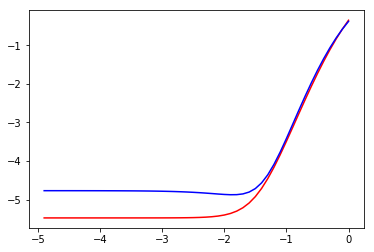

In [8]:
import matplotlib.pyplot as plt

# implement code given
tn = tX.shape[0]
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0,5,0.1)

for i in index:
  w = ridge_regression(tX,tY,10**i)
  tloss = tloss + [np.sum((np.dot(tX,w) - tY)**2)/tn/2]
  vloss = vloss + [np.sum((np.dot(vX,w) - vY)**2)/vn/2]
  
plt.plot(index, np.log(tloss), 'r')
plt.plot(index, np.log(vloss), 'b')


# to find the index that gives minimum vloss
min_l = index[np.argmin(vloss)]

lamb = 10**(min_l)
print("The lambda that minimizes validation loss is: " + str(lamb))

## The lambda that minimizes validation loss is: 0.012589254117941668